In [1]:
# %pip install -e .

In [2]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ensure project root (parent of notebooks) is on sys.path so src can be resolved
project_root = os.path.dirname(os.getcwd())
if project_root not in sys.path:
	sys.path.insert(0, project_root)

from src.data import strategie_multivarie,strategie_analyses

In [3]:
# build a path relative to the notebook folder (notesbooks -> project root)
project_root = os.path.dirname(os.getcwd())  # parent of notesbooks
candidate = os.path.join(project_root, 'data', 'interim', 'titanic_pre_univarie.csv')

# if the candidate does not exist, search the project tree for the file
if not os.path.exists(candidate):
	found = None
	for root, _, files in os.walk(project_root):
		if 'titanic_pre_univarie.csv' in files:
			found = os.path.join(root, 'titanic_pre_univarie.csv')
			break
	if found:
		candidate = found
	else:
		raise FileNotFoundError(f"dfall.csv not found. Searched: {candidate} and project tree under {project_root}")

# load the dataframe
df = pd.read_csv(candidate)
print(f"Loaded df from: {candidate}")

Loaded df from: c:\Users\hp\Desktop\end_to_end_mlops\data\interim\titanic_pre_univarie.csv


In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_quantile,Fare_quantile
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,B96 B98,S,-0.695859,-1.373288
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,65.6344,C85,C,0.823696,2.719808
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,B96 B98,S,-0.391395,-0.644732
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S,0.662165,0.989391
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,B96 B98,S,0.662165,-0.537371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0.0,0,211536,13.0000,B96 B98,S,-0.337215,-0.110063
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0.0,0,112053,30.0000,B42,S,-0.957723,0.624066
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.0,1.0,2,W./C. 6607,23.4500,B96 B98,S,0.046488,0.285474
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0.0,0,111369,30.0000,C148,C,-0.391395,0.624066


In [5]:
multivarie_strategie=strategie_multivarie.MultivariateAnalyzer()

<Figure size 800x600 with 0 Axes>

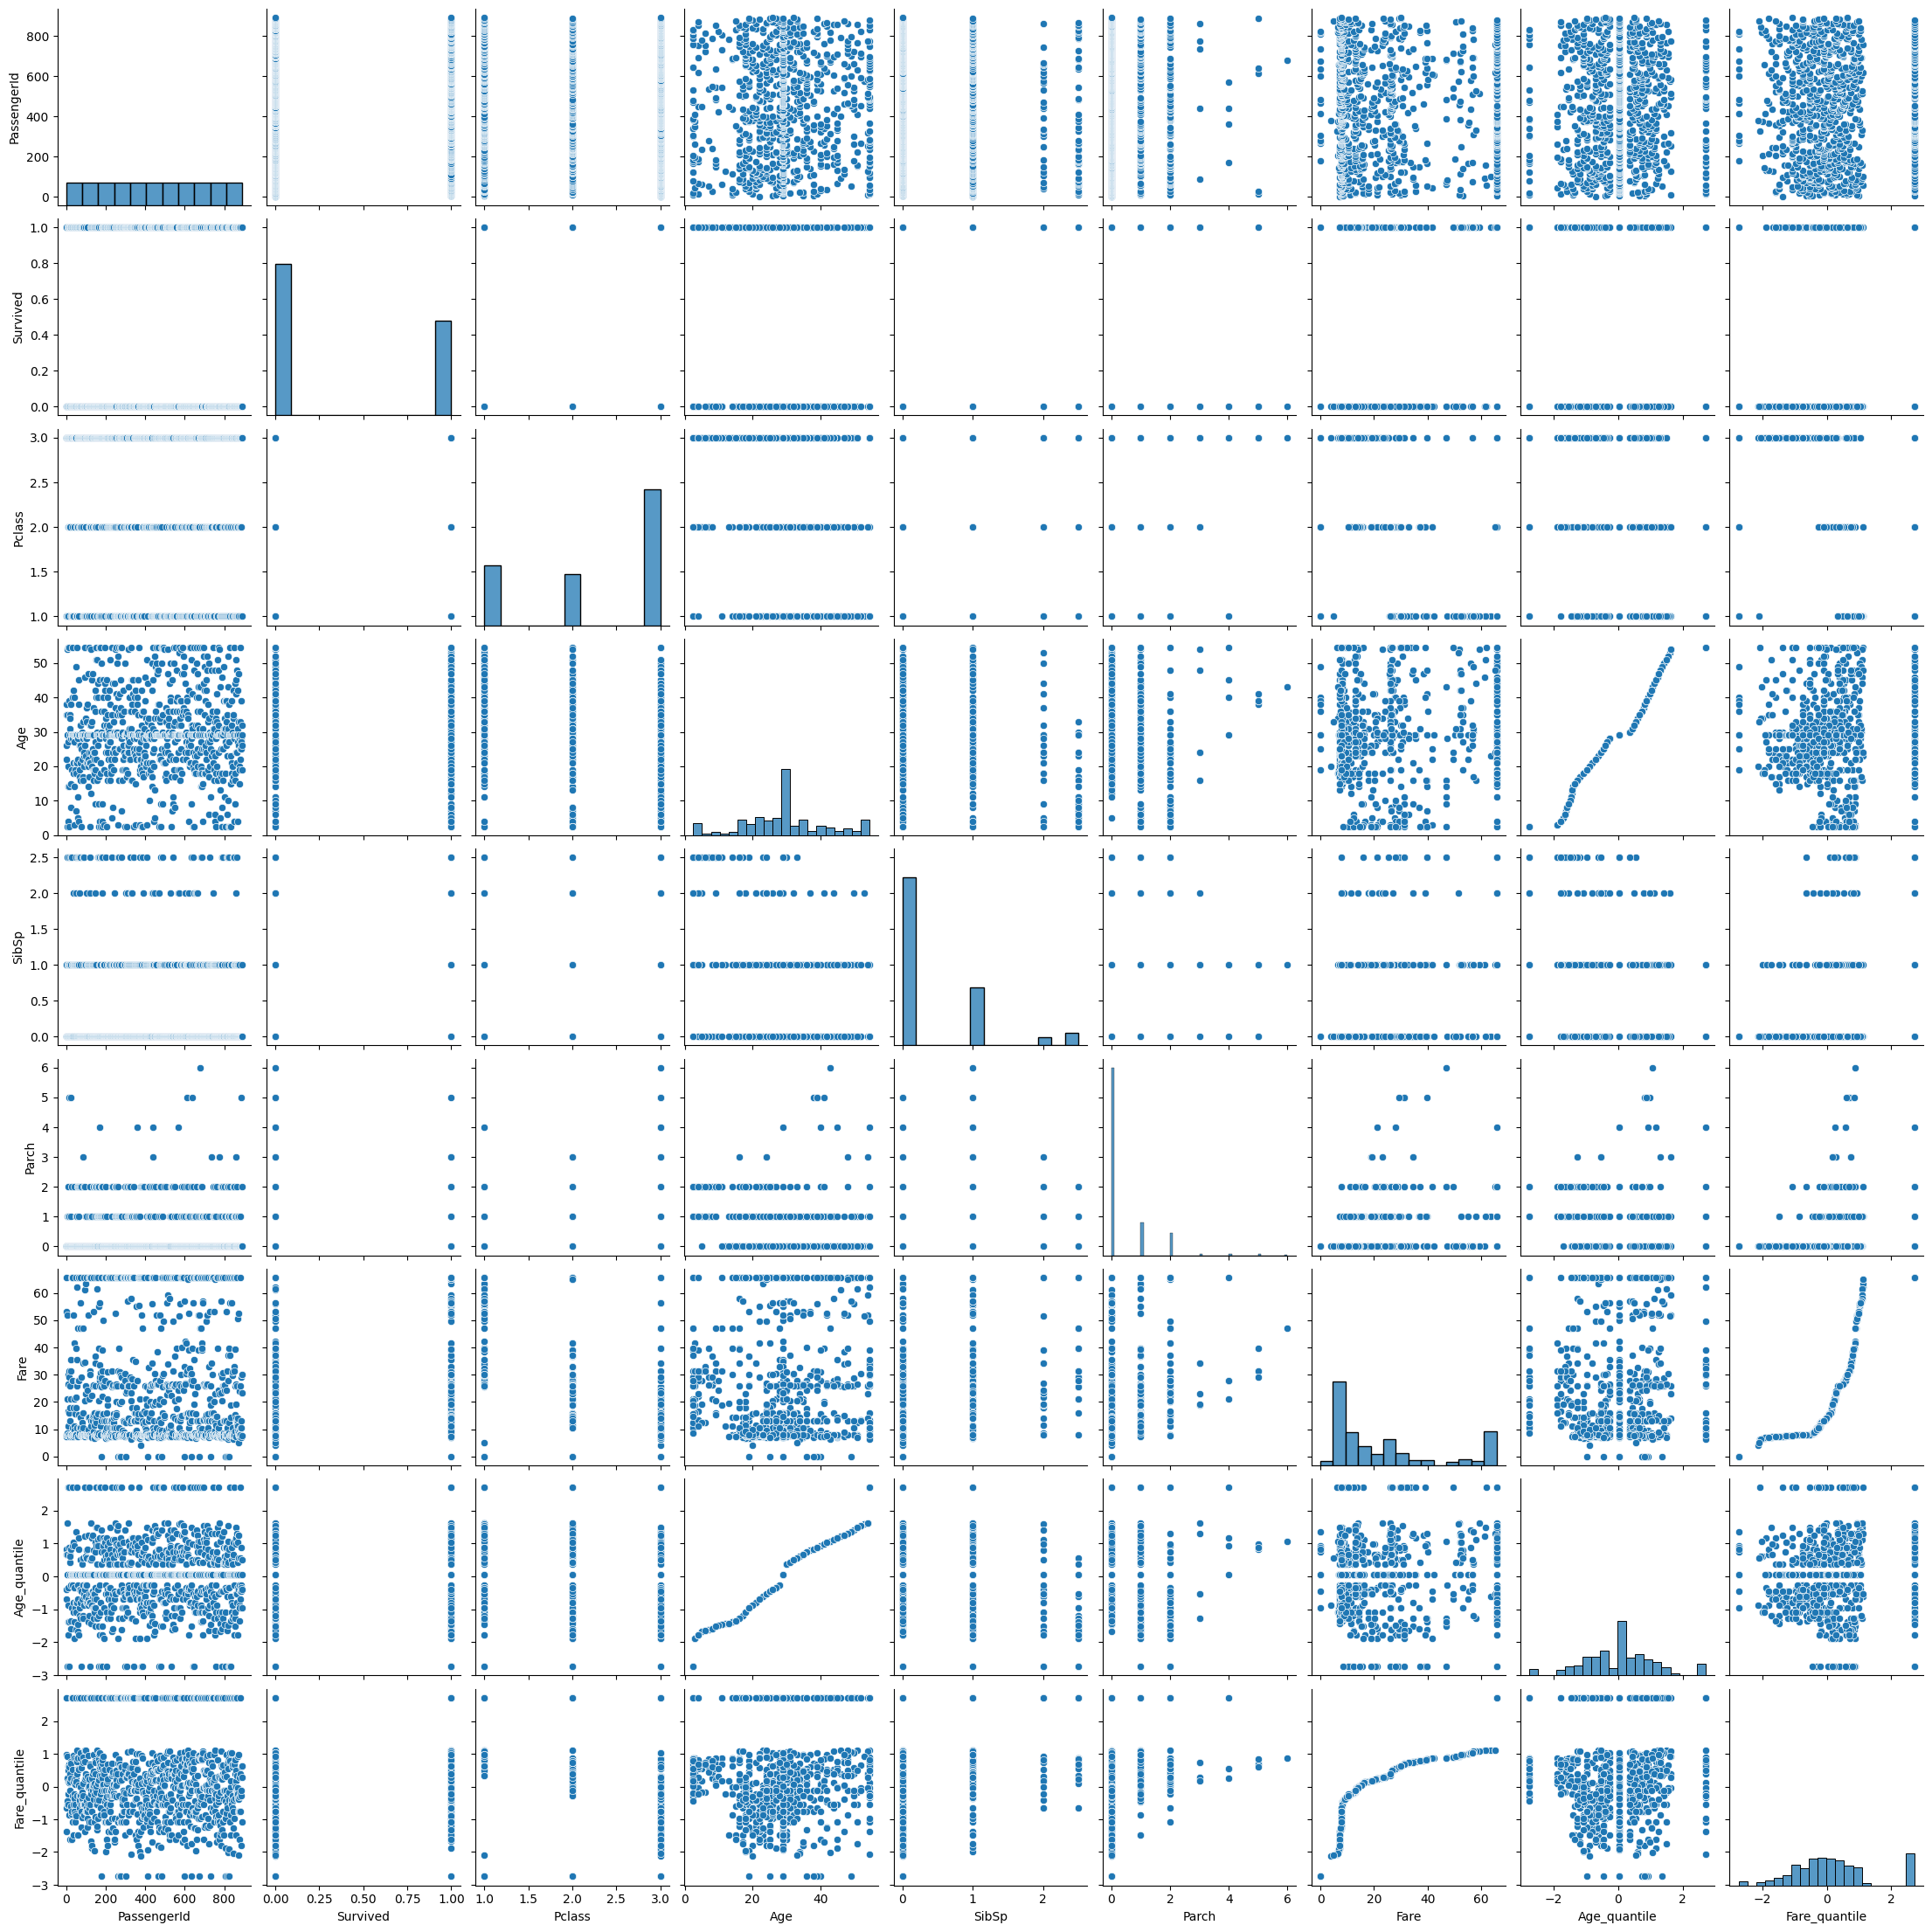

In [6]:
multivarie_strategie.plot_relationship(df)

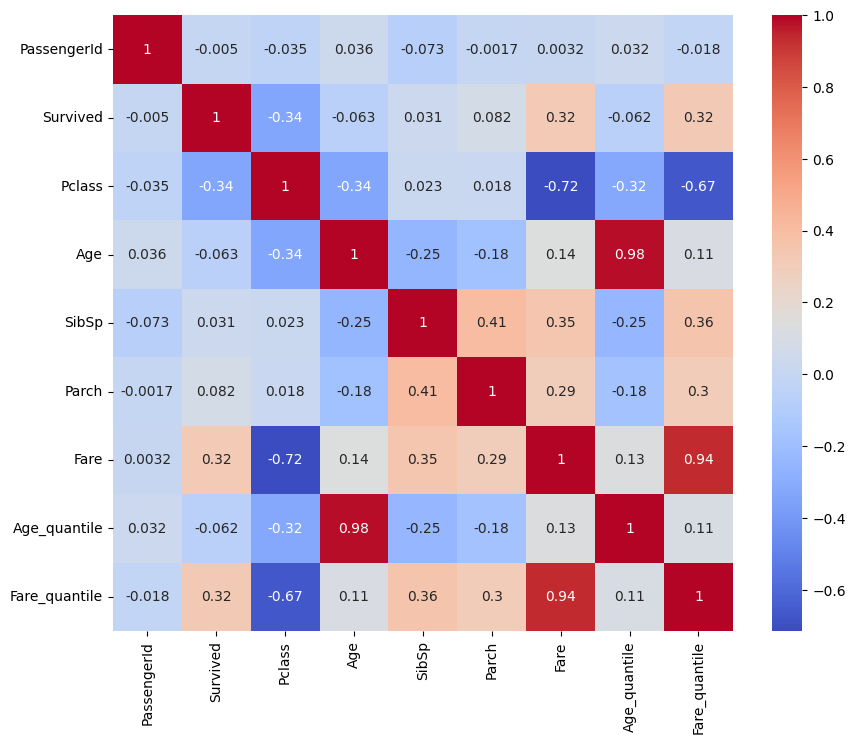

In [8]:
# call heatmap_correlation without passing a columns list (method expects only the dataframe)
multivarie_strategie.heatmap_correlation(df)